In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [11]:
df_daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
df_daily_sales.set_index('Order Date', inplace=True)

In [13]:
df_daily_sales.head()

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,288.060
2015-01-05,19.536
2015-01-06,4407.100
2015-01-07,87.158


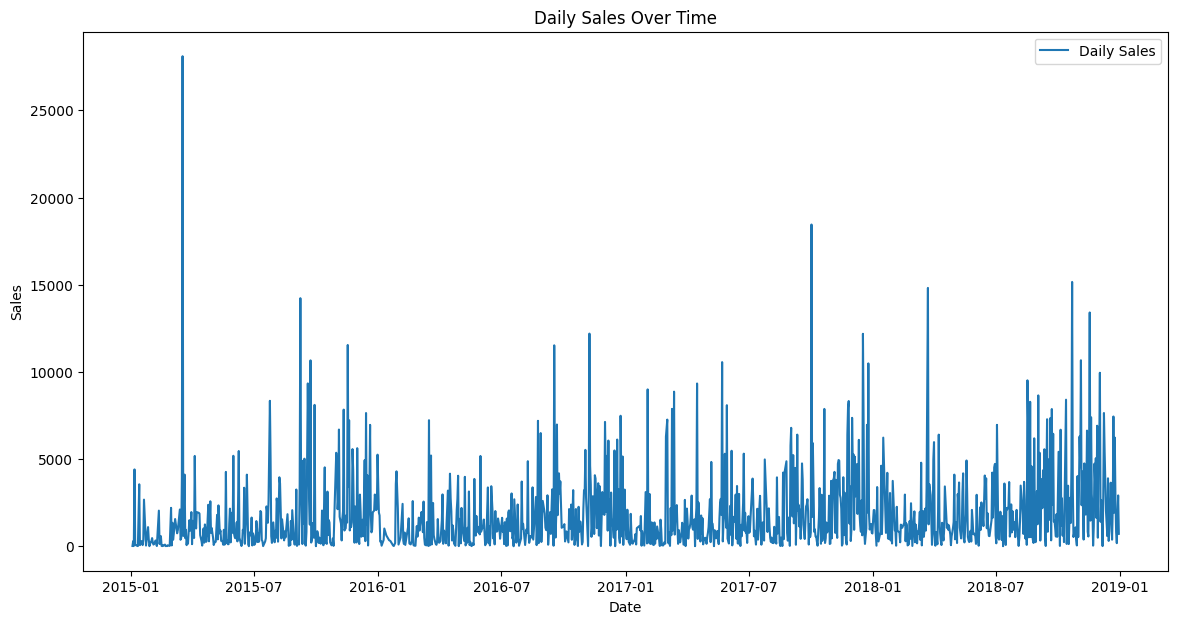

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df_daily_sales, label='Daily Sales')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

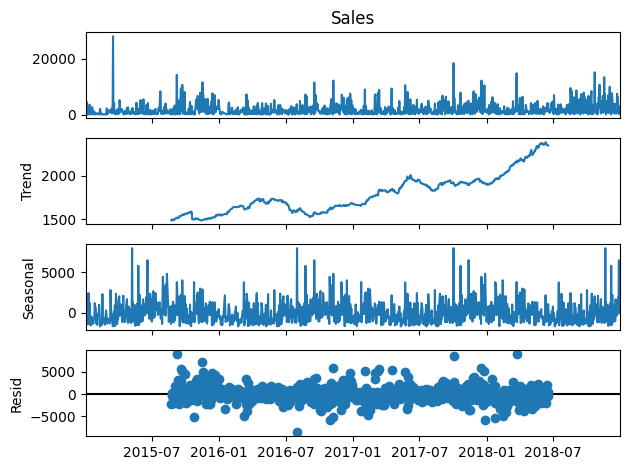

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_daily_sales['Sales'], model='additive', period=365)
decomposition.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily_sales['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.761112092918498
p-value: 5.669526815779458e-07


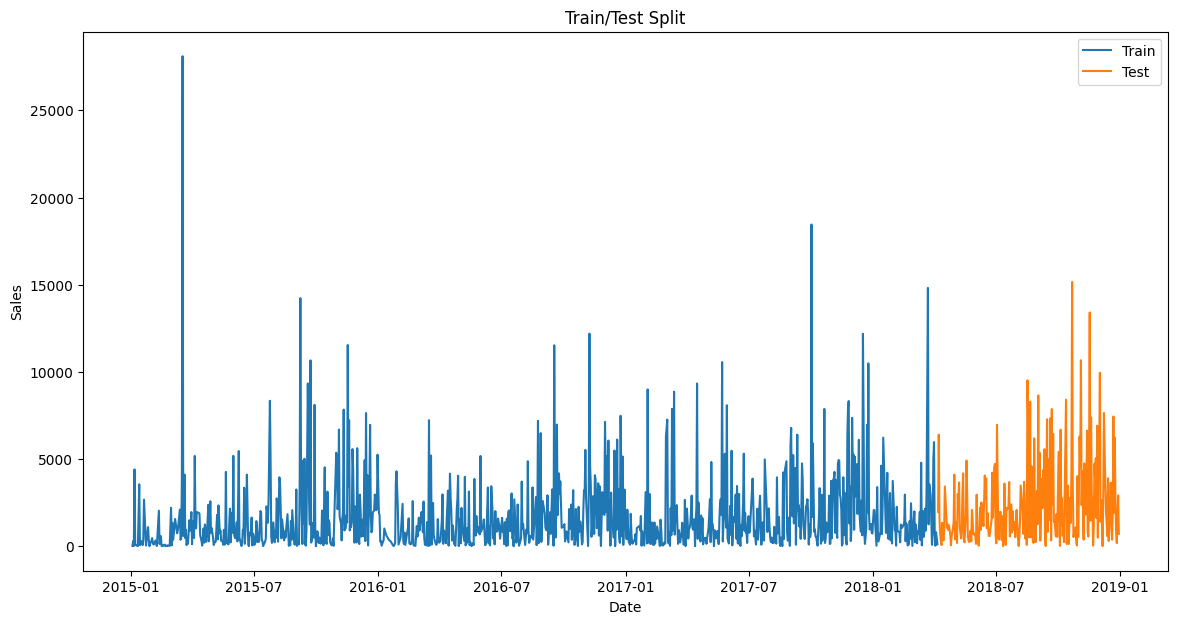

In [18]:
train_size = int(len(df_daily_sales) * 0.8)
train, test = df_daily_sales.iloc[:train_size], df_daily_sales.iloc[train_size:]
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Sales'], order=(5, 1, 0)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  984
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9015.564
Date:                Fri, 31 May 2024   AIC                          18043.128
Time:                        21:09:12   BIC                          18072.471
Sample:                             0   HQIC                         18054.290
                                - 984                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7934      0.022    -36.659      0.000      -0.836      -0.751
ar.L2         -0.6081      0.031    -19.537      0.000      -0.669      -0.547
ar.L3         -0.4822      0.031    -15.385      0.0

C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


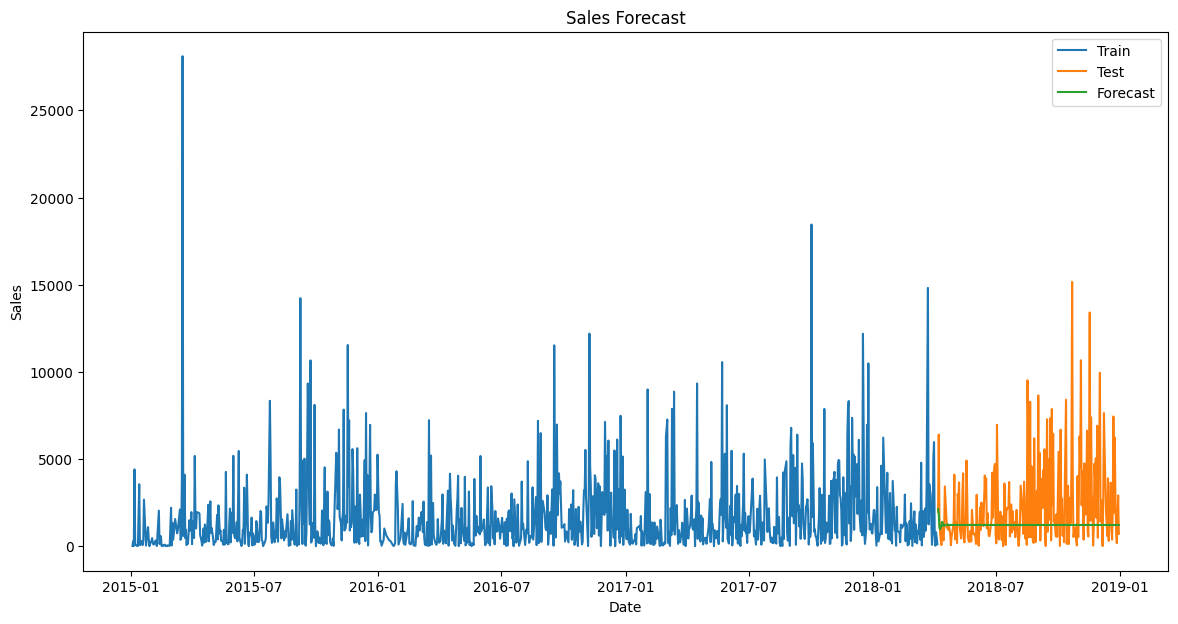

In [24]:
forecast = model_fit.forecast(steps=len(test))
test.loc[:, 'Forecast'] = forecast.values
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(test['Forecast'], label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Sales'], test['Forecast'], squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 2718.9518334592017


C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
